In [1]:
'''
Server Name: zillowdata.cnyrvm7s6vwa.us-east-1.rds.amazonaws.com
Port: 1433
Username: user_readonly 
Password: Zillow
Database Name: Zillow

'''
import pyodbc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

Retrieve datasets from SQL Server

In [2]:
## Retrieve datasets from SQL Server
cnxn = pyodbc.connect(driver='FreeTDS',tds_version='7.4', server='zillowdata.cnyrvm7s6vwa.us-east-1.rds.amazonaws.com', database='Zillow',user = "user_readonly", password = "Zillow", port = 1433 )
cursor = cnxn.cursor()
clean_input = pd.read_sql('select * from dbo.zillow_data_clean',cnxn ) 


In [3]:
states=['GA', 'NY', 'CA', 'IL', 'WA', 'TX', 'DC']
features = ['home_type_code','home_age','home_size','bathrooms','bedrooms','tax_value']

# Filter inputs by state
clean_input_state = clean_input[clean_input['state_id'] == 'CA']
clean_input_state.describe()


,home_type_code,bathrooms,bedrooms,home_size,latitude,longitude,property_size,tax_value,home_age,zestimate_amount
count,105878.000000,105878.000000,105878.000000,1.058780e+05,105878.000000,105878.000000,1.057070e+05,1.058780e+05,105878.000000,1.058780e+05
mean,2.809328,2.313374,3.229009,1.882557e+03,34.060866,-118.261137,1.374737e+05,5.748691e+05,60.995891,9.900895e+05
std,0.575649,1.096728,0.970528,4.508409e+03,0.241144,0.230767,8.476851e+06,2.234918e+06,21.954039,1.086110e+06
min,1.000000,0.250000,0.000000,1.000000e+00,32.563125,-120.671639,1.000000e+00,9.000000e+00,0.000000,3.579000e+04
25%,3.000000,2.000000,3.000000,1.226000e+03,33.947306,-118.438098,5.758000e+03,2.234740e+05,47.250000,5.447690e+05
50%,3.000000,2.000000,3.000000,1.590000e+03,34.053635,-118.287923,7.148000e+03,3.882080e+05,64.000000,6.802685e+05
75%,3.000000,3.000000,4.000000,2.178000e+03,34.166667,-118.090060,1.026700e+04,6.366955e+05,72.000000,1.029796e+06
max,3.000000,9.500000,9.000000,1.399900e+06,46.570352,-117.059736,1.051974e+09,6.741027e+08,361.000000,6.206378e+07


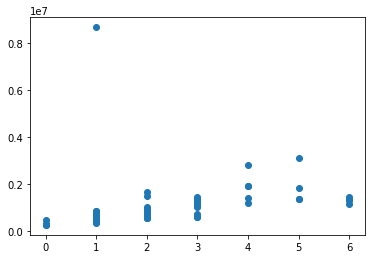

In [8]:
# Find correlation of each attributes with prediction to see its effect 
plt.yscale('linear')
#plt.yscale('log')

#plt.scatter( clean_input_state.home_size, clean_input_state.zestimate_amount )
plt.scatter( clean_input_state.bedrooms, clean_input_state.zestimate_amount)
#plt.scatter( clean_input_state.bathrooms, clean_input_state.zestimate_amount)
#plt.scatter( clean_input_state.home_age, clean_input_state.zestimate_amount)
#plt.scatter( clean_input_state.tax_value, clean_input_state.zestimate_amount)


In [11]:

# predicted value  = Zestimate_amount

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score 

X = clean_input_state[features]
y = clean_input_state[['zestimate_amount']].values

## Handling categorical variable of home_type
## X = pd.get_dummies(data=X, drop_first=True)

## 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# predict the test dataset
y_pred = regressor.predict(X_test)


# print coeff

print("Coefficinets --> ",regressor.coef_)
print("Intercept    --> ",regressor.intercept_)


# Score
print('Model Score  --> ',regressor.score(X_test, y_test))
print('Model R2 - Score  --> ',metrics.r2_score(y_test, y_pred))




# Print predictions and actuals side-by-side
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(10))

# Measuring metrics for accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Coefficinets -->  [[ 6.06324976e+04  7.38932452e+03  3.40412775e+00  3.32941684e+05
  -3.30721348e+04  8.31732804e-01]]
Intercept    -->  [-751369.12237357]
Model Score  -->  0.6901253309296747
Model R2 - Score  -->  0.6901253309296747
      Actual     Predicted
0  1666020.0  2.049377e+06
1   496599.0  4.506827e+05
2  1447737.0  6.262474e+05
3   573688.0  7.362201e+05
4   806127.0  9.231880e+05
5   459464.0  6.365950e+05
6   500009.0  7.513490e+05
7   505692.0  4.962250e+05
8   746644.0  1.140822e+06
9   948291.0  8.869982e+05
Mean Absolute Error: 310292.6777573296
Mean Squared Error: 334606121527.0743
Root Mean Squared Error: 578451.4858888983


In [12]:
for state in states :
    clean_input_state = clean_input[clean_input['state_id'] == state]
    print("----------------------------------------")
    print("Building model for state ",state)
    X = clean_input_state[features]
    y = clean_input_state[['zestimate_amount']].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    # predict the test dataset
    y_pred = regressor.predict(X_test)
    # print coeff
    print("Coefficinets --> ",regressor.coef_)
    print("Intercept    --> ",regressor.intercept_)
    # Score
    print('Model Score  --> ',regressor.score(X_test, y_test))
    print('Model R2-Score  --> ',metrics.r2_score(y_test, y_pred))




----------------------------------------
Building model for state  GA
Coefficinets -->  [[ 8.50335373e+03  2.00352091e+02  3.03695663e+01  1.20435797e+04
  -8.98421012e+03  8.58308622e-01]]
Intercept    -->  [4111.30817737]
Model Score  -->  0.883369102675527
Model R2-Score  -->  0.8833691026755269
----------------------------------------
Building model for state  NY
Coefficinets -->  [[ 5.40529672e+04 -9.74306246e+02  1.65256174e+01  1.93136702e+05
  -3.09580852e+03  7.37940265e-01]]
Intercept    -->  [-136987.95857311]
Model Score  -->  0.7341409138160291
Model R2-Score  -->  0.7341409138160291
----------------------------------------
Building model for state  CA
Coefficinets -->  [[ 6.06324976e+04  7.38932452e+03  3.40412775e+00  3.32941684e+05
  -3.30721348e+04  8.31732804e-01]]
Intercept    -->  [-751369.12237357]
Model Score  -->  0.6901253309296747
Model R2-Score  -->  0.6901253309296747
----------------------------------------
Building model for state  IL
Coefficinets -->  [[-1